# Part1. 데이터 전처리
<img src="./src/part1.png" width="250"/>

In [1]:
import pandas as pd

In [67]:
path = r'./data/캐글 타이타닉/train.csv'
train_df = pd.read_csv( path )

path = r'./data/캐글 타이타닉/test.csv'
test_df = pd.read_csv( path )

## 데이터 파악
<img src="./src/titanic_data_desc.png" width="500"/>

In [3]:
train_df[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
test_df[:3]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
train_df.isna().sum() / len(train_df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
test_df.isna().sum() / len(test_df) * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

## 결측값
<img src="./src/missing_value.png" width="400"/>

In [7]:
train_df[ train_df['Embarked'].isna() ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

### Embarked

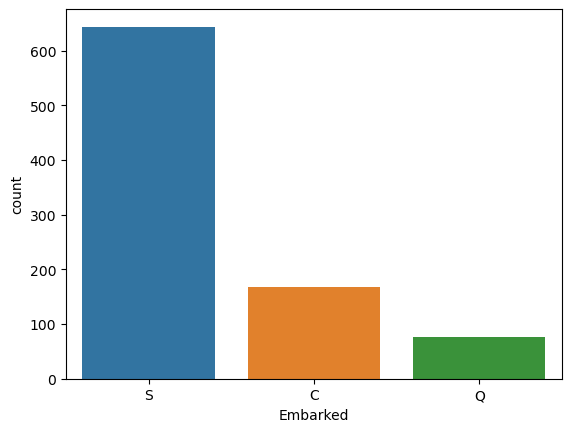

In [9]:
# 1-1. 최빈값으로 채우기
plt.figure()

sns.countplot( train_df, x='Embarked' )

plt.show()

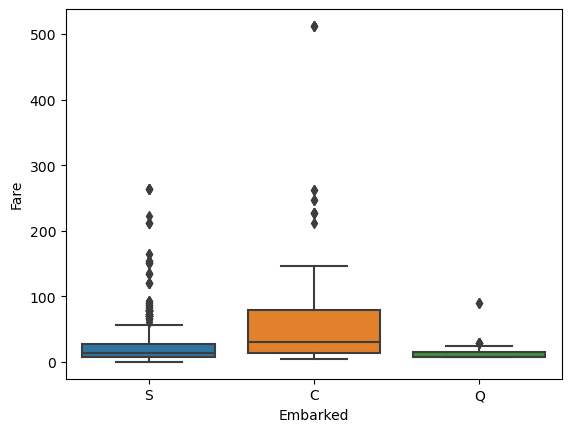

In [10]:
# 1-2. 데이터 추세 확인해서 채우기
plt.figure()

sns.boxplot( train_df, x='Embarked', y='Fare')#, hue='Sex' )
#plt.ylim( [0, 120] )
#plt.axhline( 80, color='red' )

plt.show()

In [11]:
train_df.loc[ train_df['Embarked'].isna(), 'Embarked' ] = 'C'

### Fare

In [12]:
test_df[ test_df['Fare'].isna() ]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


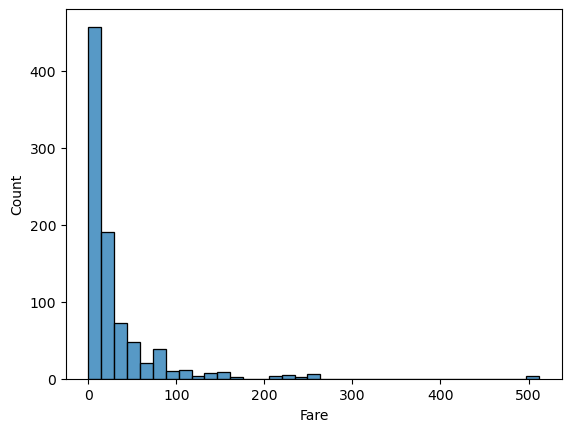

14.4542

In [13]:
# 2-1. 한쪽으로 치우쳐있어서 평균값보다는 중간값으로 채우기
# test_df에 결측치가 있지만 train_df로 확인
plt.figure()

sns.histplot( train_df, x='Fare', bins=35 )

plt.show()
train_df['Fare'].median()

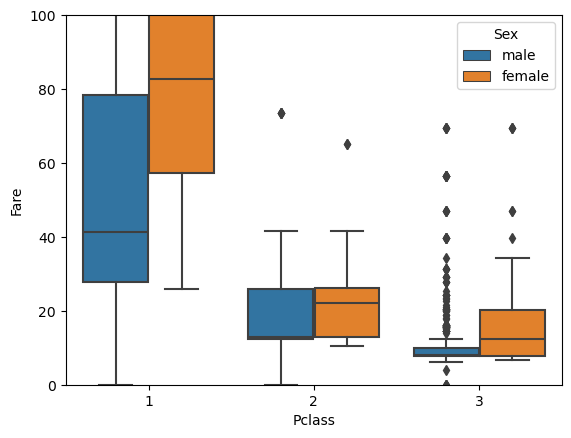

In [14]:
# 2-2. 데이터 추세 확인해서 채우기
plt.figure()

sns.boxplot( train_df, x='Pclass', y='Fare', hue='Sex' )
plt.ylim( [0, 100] )

plt.show()

In [15]:
# Pclass = 3, 남성의 Fare 중간값
train_df.groupby( ['Pclass', 'Sex'] )['Fare'].median()[3, 'male']

7.925

In [16]:
test_df.loc[ test_df['Fare'].isna(), 'Fare' ] = 7.925

### Age

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


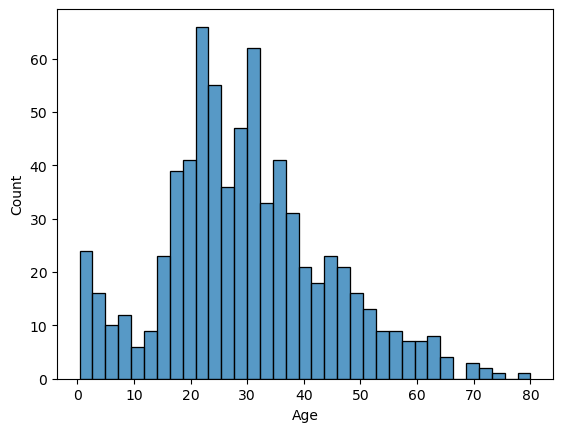

In [17]:
# 3-1. 평균값으로 채우기
plt.figure()

sns.histplot( train_df, x='Age', bins=35 )

plt.show()

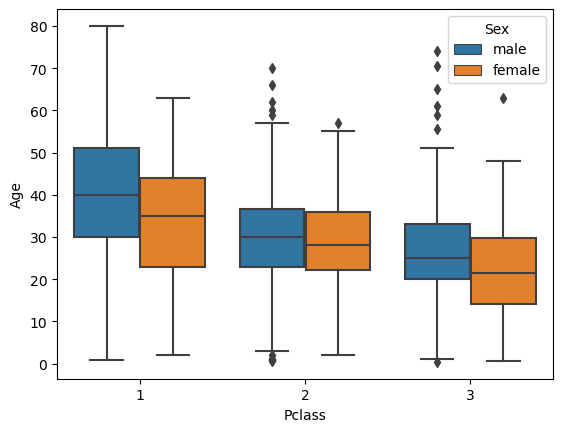

In [18]:
# 3-2. 데이터 추세 확인해서 채우기
plt.figure()

sns.boxplot( train_df, x='Pclass', y='Age', hue='Sex' )

plt.show()

In [19]:
temp = train_df.groupby( ['Pclass', 'Sex'] )['Age'].mean()
temp

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [20]:
for val in temp.index:
    condition_na = train_df['Age'].isna()
    condition_pclass = train_df['Pclass'] == val[0]
    condition_sex = train_df['Sex'] == val[1]
    
    train_df.loc[ condition_na & condition_pclass & condition_sex, 'Age' ] = temp[ val ]

    condition_na = test_df['Age'].isna()
    condition_pclass = test_df['Pclass'] == val[0]
    condition_sex = test_df['Sex'] == val[1]
    
    test_df.loc[ condition_na & condition_pclass & condition_sex, 'Age' ] = temp[ val ]

In [21]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [22]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

# Part2. Feature Engineering
<img src="./src/part2.png" width="400"/>
<img src="./src/before_feature.png" width="700"/>
<img src="./src/after_feature.png" width="700"/>

## 1. 카테고리도 아니고 숫자도 아닌 것들에서 데이터 추출

In [23]:
def get_name(x):
    return x.split(', ')[1].split('.')[0]

def get_nameCategory(x):
    if x == 'Mr' or x == 'Master':
        return x
    elif x in ['Mrs', 'Miss', 'Mme', 'Ms', 'Lady', 'Mile']:
        return 'Woman'
    else:
        return 'Etc'

train_df['Name_c'] = train_df['Name'].apply(get_name).apply( get_nameCategory )

## 2. 스케일링
### 로그변환 np.log1p
<img src="./src/scale_log.png" width="500"/>

In [24]:
import numpy as np

In [25]:
# np.log( train_df['Fare'] + 1 ) : 0은 로그변환이 불가능하여 + 1
train_df['Fare_log'] = np.log1p( train_df['Fare'] )

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


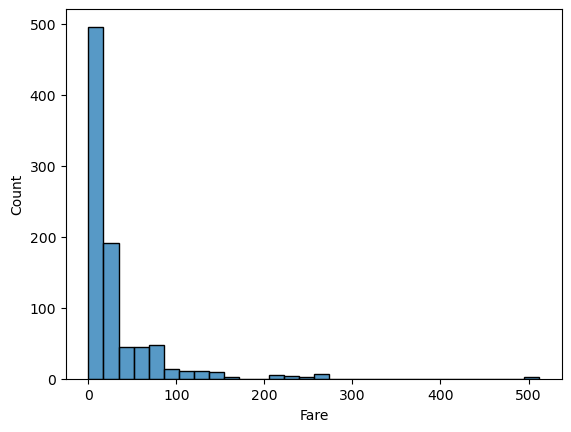

In [26]:
# 이상치 영향도를 낮추기 위해 로그변환
plt.figure()

sns.histplot( train_df, x='Fare', bins=30 )

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


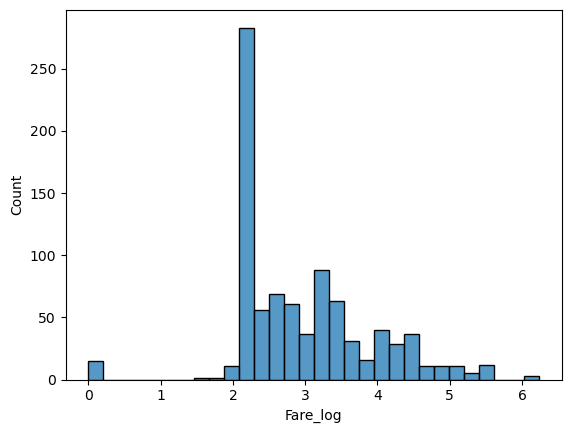

In [27]:
plt.figure()

sns.histplot( train_df, x='Fare_log', bins=30 )

plt.show()

### 표준화 StandardScaler
<img src="./src/scale_standard.png" width="500"/>

In [28]:
# 일괄적으로 숫자 데이터들을 표준화 스케일링 하기
#(train_df['Age'] - train_df['Age'].mean()) / train_df['Age'].std()

from sklearn.preprocessing import StandardScaler

In [29]:
# 1. 스케일러 만들기
standard_sc = StandardScaler()
# 2. 데이터 넣고 훈련
standard_sc.fit( train_df[['Age', 'Fare_log']] )
# 3.실제로 스케일링을 수행
train_df[['Age_s', 'Fare_s']] = standard_sc.transform( train_df[['Age', 'Fare_log']] )

In [30]:
# test에도 동일하게 적용
test_df['Fare_log'] = np.log1p( test_df['Fare'] )
test_df[['Age_s', 'Fare_s']] = standard_sc.transform( test_df[['Age', 'Fare_log']] )

## 3. 인코딩

In [31]:
train_df['Family'] = train_df['Parch'] + train_df['SibSp']

In [32]:
# 숫자 데이터이지만 카테고리 형식을 띔, 구간별로 나눠서 카테고리 줄이기
def get_familyCategoey(x):
    if x == 0:
        return 'Alone'
    elif x in [1, 2, 3]:
        return 'Small_f'
    else:
        return 'Big_f'

train_df['Family_c'] = train_df['Family'].apply( get_familyCategoey )

In [33]:
test_df['Family'] = test_df['Parch'] + test_df['SibSp']
test_df['Family_c'] = test_df['Family'].apply( get_familyCategoey )

### One-hot 인코딩 pd.get_dummies
<img src="./src/onehot_encoding.png" width="500"/>

In [34]:
cate_cols = ['Pclass', 'Sex', 'Embarked', 'Family_c']

train_final = pd.get_dummies( train_df, columns=cate_cols, dtype='int')# drop_first=True )
test_final = pd.get_dummies( test_df, columns=cate_cols, dtype='int')#, drop_first=True )

In [35]:
train_final.iloc[ : , 11 : ]

,Age_s,Fare_s,Family,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family_c_Alone,Family_c_Big_f,Family_c_Small_f
0,-0.551366,-0.879741,1,0,0,1,0,1,0,0,1,0,0,1
1,0.654030,1.361220,1,1,0,0,1,0,1,0,0,0,0,1
2,-0.250017,-0.798540,0,0,0,1,1,0,0,0,1,1,0,0
3,0.428018,1.062038,1,1,0,0,1,0,0,0,1,0,0,1
4,0.428018,-0.784179,0,0,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.174680,-0.333698,0,0,1,0,0,1,0,0,1,1,0,0
887,-0.777378,0.487082,0,1,0,0,1,0,0,0,1,1,0,0
888,-0.570201,0.242007,3,0,0,1,1,0,0,0,1,0,0,1
889,-0.250017,0.487082,0,1,0,0,0,1,1,0,0,1,0,0


# Part3. 모델 생성 및 훈련
<img src="./src/part3.png" width="250"/>

## 훈련용 / 검증용 데이터 나누기
- 보통 7:3, 데이터가 작은 경우 8:2

In [36]:
feature_names = [ 'Age_s', 'Fare_s', 'Pclass_2', 'Pclass_3', 'Sex_male', 
                 'Embarked_Q', 'Embarked_S', 'Family_c_Big_f', 'Family_c_Small_f' ]

# target : 1차원 (Series)
# feature : 2차원 (DataFrame)
X = train_final[ feature_names ]
y = train_final[ 'Survived' ]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# random_state 값이 같으면 같은 결과 확인 가능
# stratify 원본 검증용 데이터 비율과 동일하게 학습

train_x, valid_x, train_y, valid_y = train_test_split( X, y, test_size=0.3, random_state=1, stratify=y )

## 1. KNN
<img src="./src/knn.png" width="500"/>

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
# 모델 생성
knn = KNeighborsClassifier()
# 모델 훈련
knn.fit(X, y)
# 예측 및 검증
knn.predict( valid_x )

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

### 하이퍼 파라미터 세팅
- 모델 별로 사용자가 정해줘야 하는 파라미터
- 데이터에 얼마나 강하게 피팅할 것인지 결정해 줌
- 오버피팅과 언더피팅 사이의 적절한 모델을 선택해 줌
- 교차검증을 이용
  
### 교차검증
<img src="./src/cross_valid.png" width="500"/>

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
# K가 무한대 : underfit => 최빈값을 따라감
# K가 1 : overfit => 근사값만 확인

score_list = []

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score( knn, train_x, train_y, cv=5 ).mean()
    score_list.append( score )

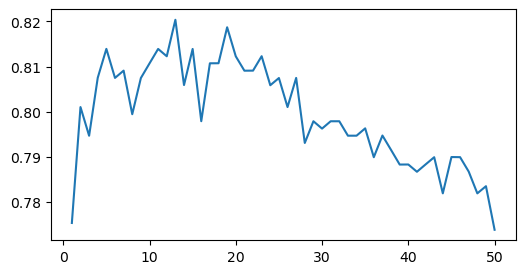

In [43]:
plt.figure( figsize=(6, 3) )

plt.plot( range(1, 51), score_list )

plt.show()

In [44]:
score_list[10:15]

[0.8139096774193548,
 0.812283870967742,
 0.8203741935483873,
 0.8058967741935484,
 0.8139096774193548]

In [45]:
# 모델 생성
knn = KNeighborsClassifier(n_neighbors=13)
# 훈련
knn.fit( train_x, train_y )
# 검증
knn.score( valid_x, valid_y )

0.7873134328358209

In [46]:
# 예측
knn_result = pd.DataFrame( test_final['PassengerId'] )
knn_result['Survived'] = knn.predict( test_final[ feature_names ] )
knn_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 2. SVM
<img src="./src/svm_c.png" width="500"/>
<img src="./src/svm_gamma.png" width="500"/>

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [48]:
params = { 'C' : [0.01, 0.1, 1, 10],
        'gamma' : [0.01, 0.1, 1, 10] }

# 1. grid 모델 생성
grid_svm = GridSearchCV( SVC(), params, cv=5 )
# 2. grid 모델 훈련
grid_svm.fit( train_x, train_y )

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]})

In [49]:
grid_svm.best_params_

{'C': 10, 'gamma': 0.1}

In [50]:
cv_result_svm = pd.DataFrame( grid_svm.cv_results_['params'] )
cv_result_svm['score'] = grid_svm.cv_results_['mean_test_score']

pd.pivot_table( cv_result_svm, index='C', columns='gamma', values='score', aggfunc='mean' )

gamma,0.01,0.10,1.00,10.00
C,,,,
0.01,0.616374,0.616374,0.616374,0.616374
0.10,0.616374,0.780194,0.748000,0.616374
1.00,0.796194,0.818645,0.815523,0.759303
10.00,0.799342,0.818710,0.789819,0.757703


In [51]:
grid_svm.score( valid_x, valid_y )

0.8171641791044776

In [52]:
svm_result = pd.DataFrame( test_final['PassengerId'] )
svm_result['Survived'] = grid_svm.predict( test_final[ feature_names ] )
svm_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 3. 결정트리
<img src="./src/decision_tree.png" width="500"/>
<img src="./src/tree_origin_overfit.png" width="500"/>

In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [54]:
params = { 'max_depth' : [3, 5, 10, 30],
        'min_samples_leaf' : [1, 10, 30, 50] }

grid_tree = GridSearchCV( DecisionTreeClassifier(), params, cv=5 )
grid_tree.fit( train_x, train_y )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10, 30],
                         'min_samples_leaf': [1, 10, 30, 50]})

In [55]:
grid_tree.best_params_

{'max_depth': 5, 'min_samples_leaf': 1}

In [56]:
cv_result_tree = pd.DataFrame( grid_tree.cv_results_['params'] )
cv_result_tree['score'] = grid_tree.cv_results_['mean_test_score']

pd.pivot_table( cv_result_tree, index='max_depth', columns='min_samples_leaf', values='score', aggfunc='mean' )

min_samples_leaf,1,10,30,50
max_depth,,,,
3,0.821832,0.813819,0.794594,0.775342
5,0.825123,0.815510,0.794594,0.775342
10,0.800981,0.809006,0.794594,0.775342
30,0.821819,0.805806,0.794594,0.775342


In [57]:
tree = DecisionTreeClassifier( max_depth=3 )
tree.fit( train_x, train_y )
pd.Series( tree.feature_importances_, index=train_x.columns )

Age_s               0.081982
Fare_s              0.054892
Pclass_2            0.000000
Pclass_3            0.171317
Sex_male            0.580615
Embarked_Q          0.000000
Embarked_S          0.000000
Family_c_Big_f      0.111194
Family_c_Small_f    0.000000
dtype: float64

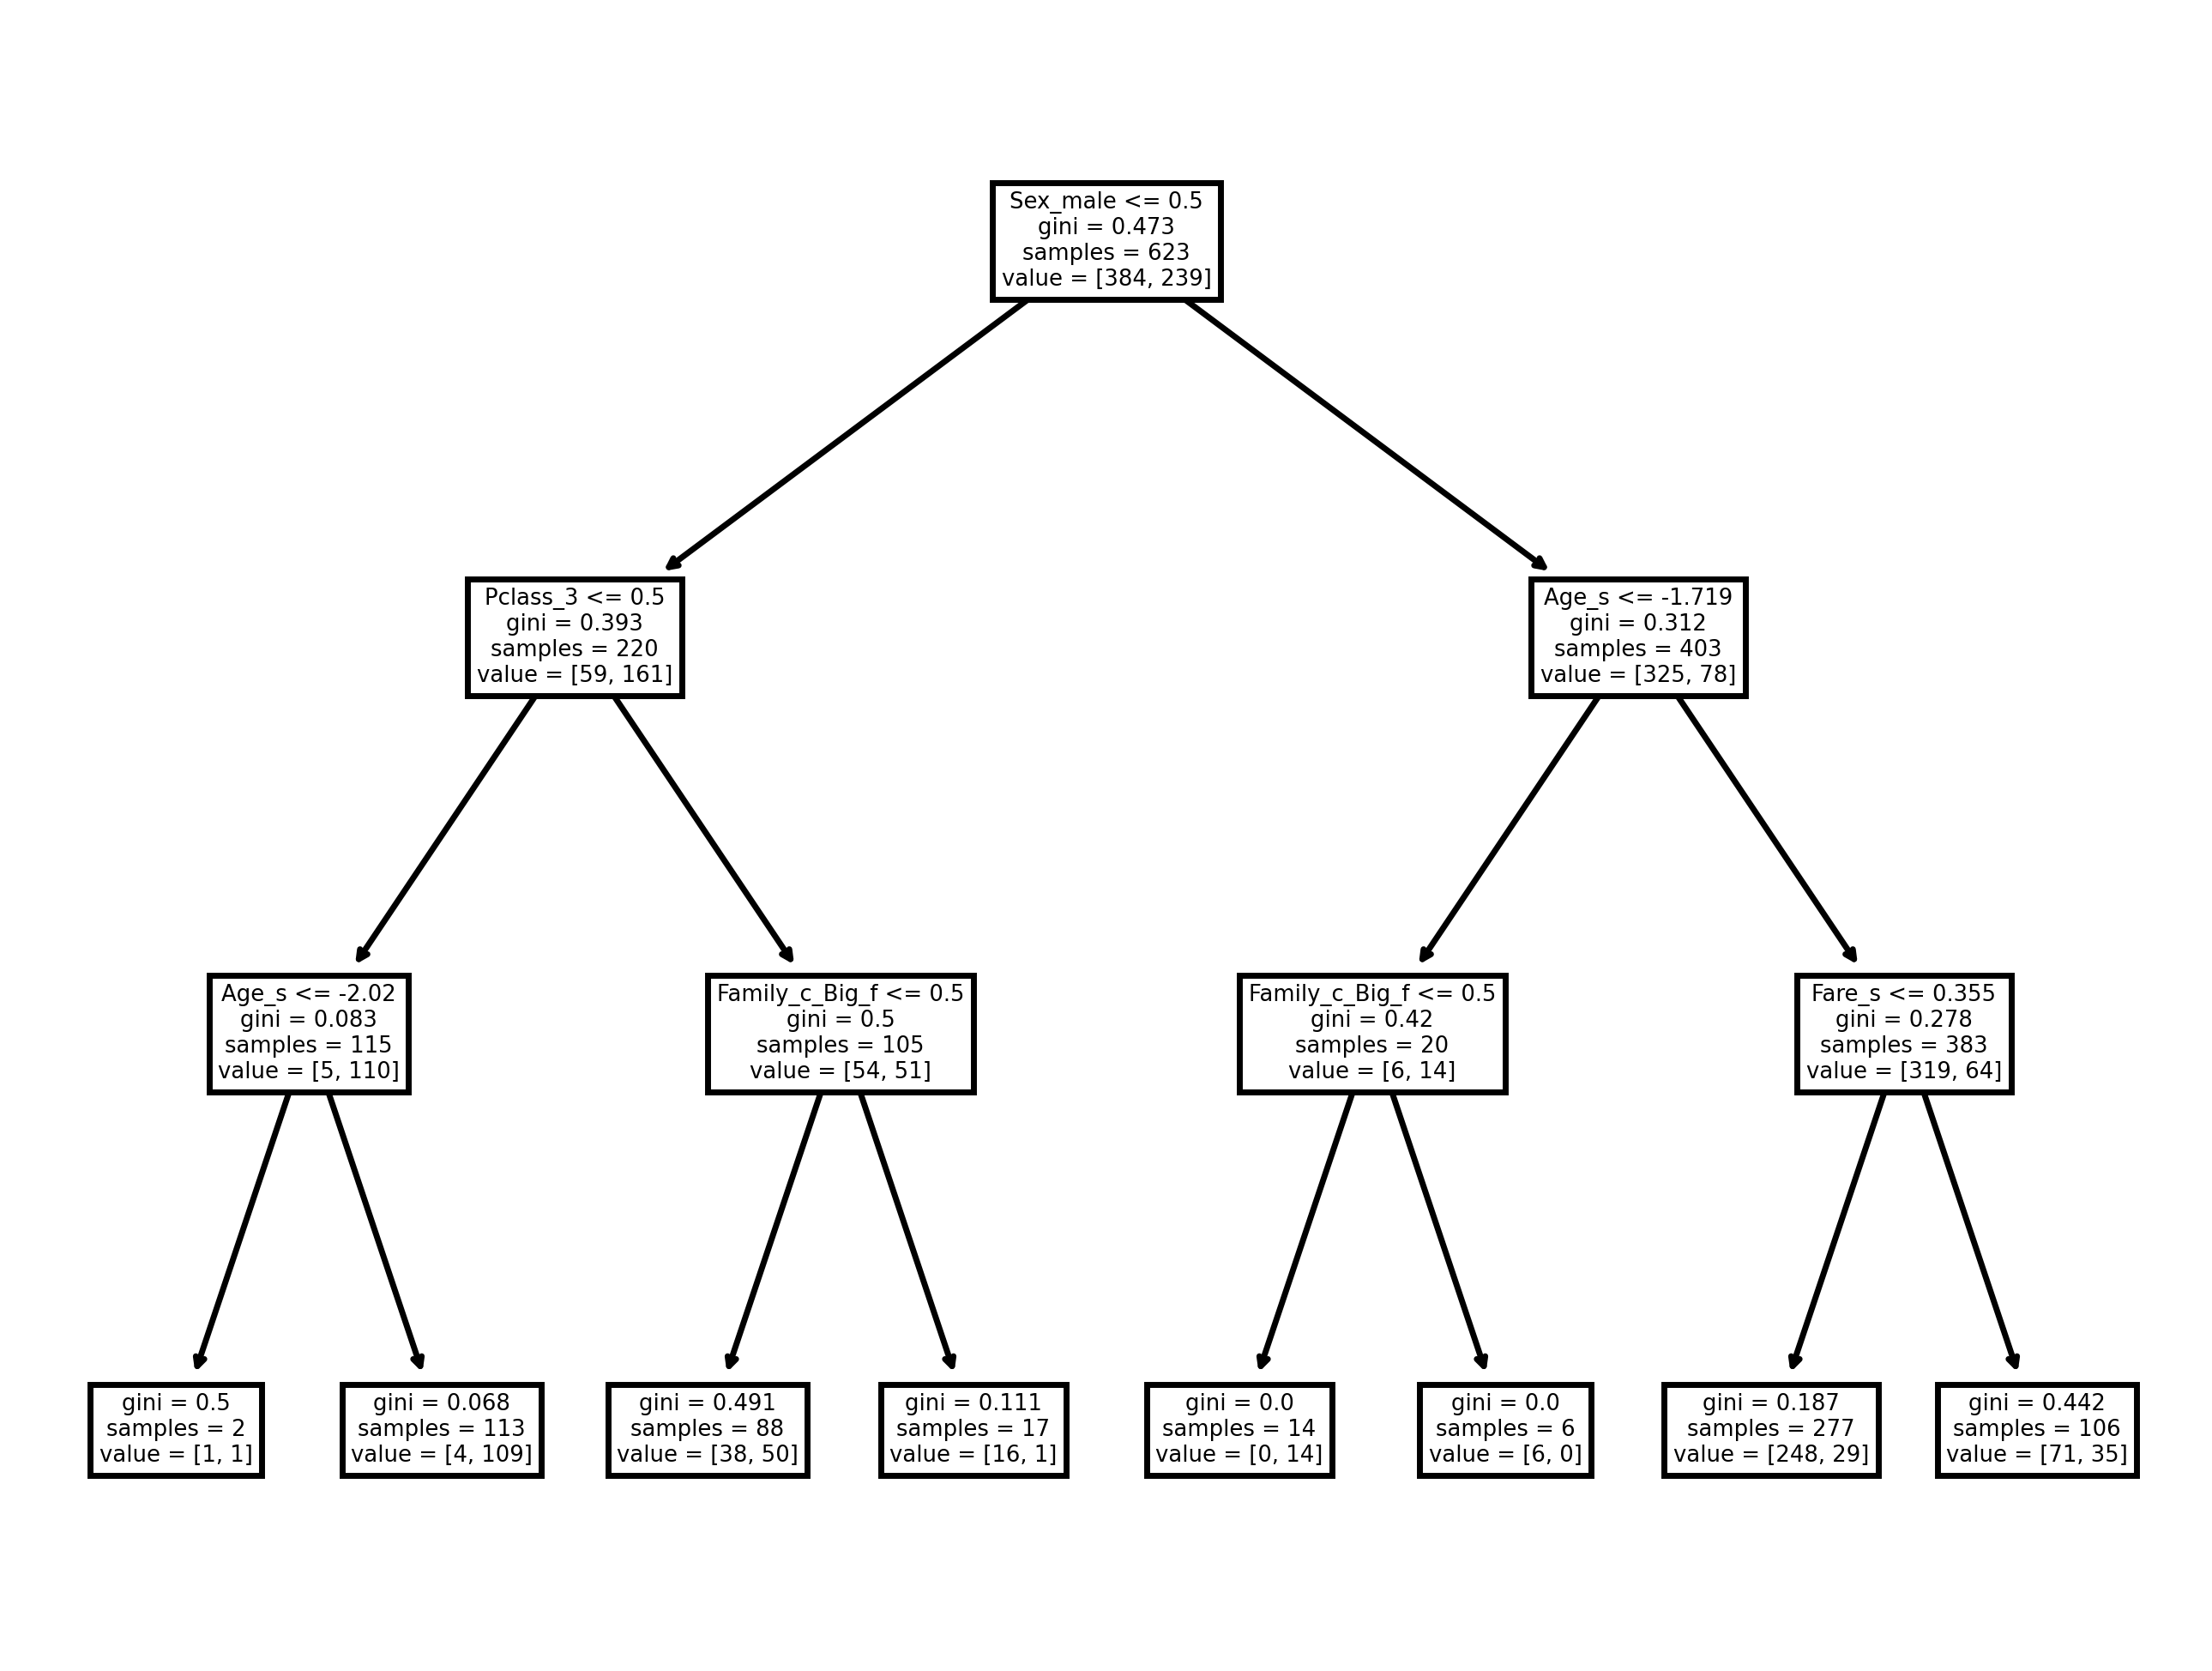

In [58]:
plt.figure(dpi=500)

plot_tree( tree, feature_names=train_x.columns )

plt.show()

## 4. Random Forest
- Bootstrapping : 여러 모델을 순차적으로 개선시키며 임의로 새로운 데이터 셋을 만
- Bagging : 여러 모델을 병렬적으로 만들어서 결과를 합침

<img src="./src/random_forest.png" width="500"/>

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
params = { 'max_depth' : [3, 5, 10, 20],
    'min_samples_leaf' : [1, 5, 10, 30] }

grid_rf = GridSearchCV( RandomForestClassifier(random_state=1), params, cv=5 )
grid_rf.fit( train_x, train_y )

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [1, 5, 10, 30]})

In [61]:
grid_rf.best_params_

{'max_depth': 10, 'min_samples_leaf': 1}

In [62]:
cv_result_rf = pd.DataFrame( grid_rf.cv_results_['params'] )
cv_result_rf['score'] = grid_rf.cv_results_['mean_test_score']

pd.pivot_table( cv_result_rf, index='max_depth', columns='min_samples_leaf', values='score', aggfunc='mean' )

min_samples_leaf,1,5,10,30
max_depth,,,,
3,0.805845,0.810658,0.807406,0.762465
5,0.820310,0.820323,0.810658,0.760865
10,0.821858,0.817071,0.813858,0.759265
20,0.812232,0.820310,0.813858,0.759265


In [63]:
grid_rf.score( valid_x, valid_y )

0.8059701492537313

In [64]:
rf_result = pd.DataFrame( test_final['PassengerId'] )
rf_result['Survived'] = grid_rf.predict( test_final[ feature_names ] )

# Part4. 결과 확인
<img src="./src/part4.png" width="250"/>

In [65]:
print(knn.score( valid_x, valid_y ))
print(grid_svm.score( valid_x, valid_y ))
print(grid_rf.score( valid_x, valid_y ))

0.7873134328358209
0.8171641791044776
0.8059701492537313


In [66]:
knn_result.to_csv( r'knn_result.csv', index=False )
svm_result.to_csv( r'svm_result.csv', index=False )
rf_result.to_csv( r'rf_result.csv', index=False )